In [2]:
# Run this to ensure TensorFlow 2.x is used
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
    pass

In [3]:
import tensorflow as tf
print(tf.__version__)

2.0.0


In [4]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/john/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

In [6]:
vocab_size = 5000
embedding_dim = 64
max_length = 200
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_portion = .8

In [13]:
articles = []
labelsList = []

#raw_data = pd.read_csv('/content/drive/My Drive/new_transaction.csv')

with open("isear.csv", 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        labelsList.append(row[0])
        article = row[0]
        for word in STOPWORDS:
            token = ' ' + word + ' '
            article = article.replace(token, ' ')
            article = article.replace(' ', ' ')
        articles.append(article)
print(len(labelsList))
print(len(articles))

7666
7666


In [42]:
import pandas as pd

data = pd.read_csv("isear.csv", delimiter="|" , error_bad_lines=False)

b'Skipping line 199: expected 43 fields, saw 44\nSkipping line 222: expected 43 fields, saw 44\nSkipping line 248: expected 43 fields, saw 44\nSkipping line 350: expected 43 fields, saw 44\nSkipping line 395: expected 43 fields, saw 44\nSkipping line 423: expected 43 fields, saw 44\nSkipping line 480: expected 43 fields, saw 44\nSkipping line 552: expected 43 fields, saw 44\nSkipping line 601: expected 43 fields, saw 45\nSkipping line 604: expected 43 fields, saw 45\nSkipping line 612: expected 43 fields, saw 45\nSkipping line 722: expected 43 fields, saw 44\nSkipping line 765: expected 43 fields, saw 44\nSkipping line 800: expected 43 fields, saw 46\nSkipping line 818: expected 43 fields, saw 45\nSkipping line 891: expected 43 fields, saw 44\nSkipping line 928: expected 43 fields, saw 44\nSkipping line 963: expected 43 fields, saw 44\nSkipping line 965: expected 43 fields, saw 45\nSkipping line 974: expected 43 fields, saw 44\nSkipping line 985: expected 43 fields, saw 44\nSkipping li

In [33]:
data.head()

,ID,CITY,COUN,SUBJ,SEX,AGE,RELI,PRAC,FOCC,MOCC,...,RELA,VERBAL,NEUTRO,Field1,Field3,Field2,MYKEY,SIT,STATE,Unnamed: 42
0,11001,1,1,1,1,33,1,2,6,1,...,3,2,0,joy,4,3,110011,"During the period of falling in love, each tim...",1,NaN
1,11001,1,1,1,1,33,1,2,6,1,...,2,0,0,fear,3,2,110012,When I was involved in a traffic accident.,1,NaN
2,11001,1,1,1,1,33,1,2,6,1,...,1,0,0,anger,1,3,110013,When I was driving home after several days of...,1,NaN
3,11001,1,1,1,1,33,1,2,6,1,...,1,0,2,sadness,4,4,110014,When I lost the person who meant the most to me.,1,NaN
4,11001,1,1,1,1,33,1,2,6,1,...,2,0,0,disgust,4,4,110015,The time I knocked a deer down - the sight of ...,1,NaN


In [41]:
#data.drop(['ID', 'CITY', 'COUN', 'SUBJ','SEX', 'PRAC', 'MOCC','AGE','RELI','FOCC','FIEL'], axis = 1) 

# Remove all columns between column index 1 to 19
data.drop(data.iloc[:, 1:19], inplace = True, axis = 1)
data.head()

,ID
0,11001
1,11001
2,11001
3,11001
4,11001


In [115]:
df2 = data.loc[:,'Field1':'SIT']
df2 = df2.drop(['Field3', 'Field2', 'MYKEY'], axis = 1)
#df2.head()

emotion_list = df2['Field1'].tolist()
sentence_list = df2['SIT'].tolist()
#Field1 to emotionlist, SIT to sentenceList, 

print(len(sentence_list))
#articless = []

# for each sentence in sentence list, I wnat to check if it contains a stopword, if yes replace the word with ' '
#for sentence in sentence_list:
 #   for word in STOPWORDS:
  #      token = ' ' + word + ' '
   #     sentence = sentence.replace(token, ' ')
    #    sentence = sentence.replace(' ', ' ')
    #sentence_list.append(sentence) 

#print(len(sentence_list))

print(sentence_list[0:3])

7503
['During the period of falling in love, each time that we met and á especially when we had not met for a long time.', 'When I was involved in a traffic accident.', 'When I was driving home after  several days of hard work, there á was a motorist ahead of me who was driving at 50 km/hour and á refused, despite his low speeed to let me overtake.']


In [116]:
for word in STOPWORDS:
    token = ' ' + word + ' '
    res = list(map(lambda token: str.replace(token, ' ', ' '), sentence_list))
print(res[0:3])

['During the period of falling in love, each time that we met and á especially when we had not met for a long time.', 'When I was involved in a traffic accident.', 'When I was driving home after  several days of hard work, there á was a motorist ahead of me who was driving at 50 km/hour and á refused, despite his low speeed to let me overtake.']


In [119]:
sentenceFiltered = []
for w in sentence_list:
    if w not in STOPWORDS:
        sentenceFiltered.append(w)
len(sentenceFiltered)        

7503

In [121]:
print(emotion_list[0:10])

['joy', 'fear', 'anger', 'sadness', 'disgust', 'shame', 'guilt', 'joy', 'fear', 'anger']


In [123]:
data = {'joy':0, 'fear':1, 'anger':2, 'sadness':3, 'disgust':4, 'shame':5, 'guilt':6 }

xx = [data[item] for item in emotion_list]

print(xx)
labelsTensor1 = tf.Variable(xx, tf.int32)
ys1 = tf.one_hot(labelsTensor1, 7)
print(ys1)

print(data)

[0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 

tf.Tensor(
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]], shape=(7503, 7), dtype=float32)
{'joy': 0, 'fear': 1, 'anger': 2, 'sadness': 3, 'disgust': 4, 'shame': 5, 'guilt': 6}


In [125]:
train_size = int(len(sentenceFiltered) * training_portion)

train_articles = sentenceFiltered[0: train_size]
train_labels = ys1[0: train_size]

validation_articles = sentenceFiltered[train_size:]
validation_labels = ys1[train_size:]

print(train_size)
print(len(train_articles))
print(len(train_labels))
print(len(validation_articles))
print(len(validation_labels))

6002
6002
6002
1501
1501


In [126]:
print(validation_labels.shape)

(1501, 7)


In [127]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_articles)
word_index = tokenizer.word_index

In [128]:
train_sequences = tokenizer.texts_to_sequences(train_articles)
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [129]:
validation_sequences = tokenizer.texts_to_sequences(validation_articles)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(len(validation_sequences))
print(validation_padded.shape)

1501
(1501, 200)


In [132]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_article(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])
print(decode_article(train_padded[10]))
print('---')
print(train_articles[10])

when my friends did not ask me to go to a new year's party á with them ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
---
When my friends did not ask me to go to a New Year's party á with them.


In [136]:
model = tf.keras.Sequential([
    # Add an Embedding layer expecting input vocab of size 5000, and output embedding dimension of size 64 we set at the top
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
#    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    # use ReLU in place of tanh function since they are very good alternatives of each other.
    tf.keras.layers.Dense(embedding_dim, activation='relu'),
    # Add a Dense layer with 5 units and softmax activation.
    # When we have multiple outputs, softmax convert outputs layers into a probability distribution.
    tf.keras.layers.Dense(7, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          320000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               66048     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 455       
Total params: 394,759
Trainable params: 394,759
Non-trainable params: 0
_________________________________________________________________


In [137]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [138]:
num_epochs = 10
history = model.fit(train_padded, train_labels, epochs=num_epochs, validation_data=(validation_padded, validation_labels), verbose=2)

Train on 6002 samples, validate on 1501 samples
Epoch 1/10
6002/6002 - 66s - loss: 1.8138 - accuracy: 0.2552 - val_loss: 1.6336 - val_accuracy: 0.3578
Epoch 2/10
6002/6002 - 59s - loss: 1.3205 - accuracy: 0.4917 - val_loss: 1.5486 - val_accuracy: 0.4337
Epoch 3/10
6002/6002 - 58s - loss: 1.0040 - accuracy: 0.6290 - val_loss: 1.4357 - val_accuracy: 0.4890
Epoch 4/10
6002/6002 - 58s - loss: 0.7828 - accuracy: 0.7264 - val_loss: 1.4718 - val_accuracy: 0.5177
Epoch 5/10
6002/6002 - 58s - loss: 0.6235 - accuracy: 0.7909 - val_loss: 1.6040 - val_accuracy: 0.5170
Epoch 6/10
6002/6002 - 58s - loss: 0.4797 - accuracy: 0.8384 - val_loss: 1.7169 - val_accuracy: 0.5083
Epoch 7/10
6002/6002 - 57s - loss: 0.3751 - accuracy: 0.8772 - val_loss: 1.9465 - val_accuracy: 0.5063
Epoch 8/10
6002/6002 - 58s - loss: 0.3083 - accuracy: 0.9010 - val_loss: 1.9149 - val_accuracy: 0.5117
Epoch 9/10
6002/6002 - 58s - loss: 0.3002 - accuracy: 0.9014 - val_loss: 2.2497 - val_accuracy: 0.5110
Epoch 10/10
6002/6002 - 5

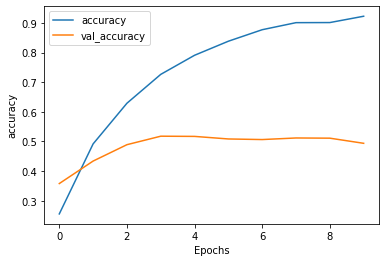

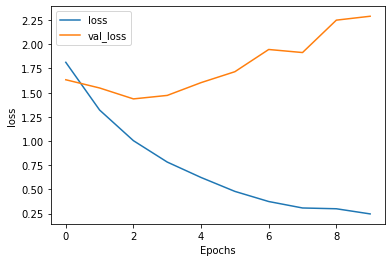

In [139]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [141]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(7, activation='sigmoid')
])


model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 200, 64)           320000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 24)                1560      
_________________________________________________________________
dense_7 (Dense)              (None, 7)                 175       
Total params: 321,735
Trainable params: 321,735
Non-trainable params: 0
_________________________________________________________________


In [142]:
num_epochs = 10
history = model2.fit(train_padded, train_labels, epochs=num_epochs, validation_data=(validation_padded, validation_labels), verbose=2)

Train on 6002 samples, validate on 1501 samples
Epoch 1/10
6002/6002 - 3s - loss: 0.4841 - accuracy: 0.8508 - val_loss: 0.4104 - val_accuracy: 0.8571
Epoch 2/10
6002/6002 - 2s - loss: 0.4100 - accuracy: 0.8571 - val_loss: 0.4099 - val_accuracy: 0.8571
Epoch 3/10
6002/6002 - 2s - loss: 0.4094 - accuracy: 0.8571 - val_loss: 0.4094 - val_accuracy: 0.8571
Epoch 4/10
6002/6002 - 2s - loss: 0.4086 - accuracy: 0.8571 - val_loss: 0.4084 - val_accuracy: 0.8571
Epoch 5/10
6002/6002 - 2s - loss: 0.4072 - accuracy: 0.8571 - val_loss: 0.4074 - val_accuracy: 0.8571
Epoch 6/10
6002/6002 - 2s - loss: 0.4051 - accuracy: 0.8571 - val_loss: 0.4059 - val_accuracy: 0.8571
Epoch 7/10
6002/6002 - 2s - loss: 0.4018 - accuracy: 0.8571 - val_loss: 0.4033 - val_accuracy: 0.8571
Epoch 8/10
6002/6002 - 2s - loss: 0.3970 - accuracy: 0.8571 - val_loss: 0.3996 - val_accuracy: 0.8571
Epoch 9/10
6002/6002 - 2s - loss: 0.3907 - accuracy: 0.8572 - val_loss: 0.3949 - val_accuracy: 0.8573
Epoch 10/10
6002/6002 - 2s - loss: